<a href="https://colab.research.google.com/github/10LeeM/290/blob/master/LR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt


Define fixed seeds to make random numbers predictable

In [61]:
np.random.seed(101)
tf.random.set_random_seed(101)

Generate random linear data

In [38]:
# Generating random linear data
# There will be 100 data points ranging from 0 to 50
x = np.linspace(0, 50, 100)
y = np.linspace(0, 50, 100)

# Adding noise to the random linear data
x += np.random.uniform(-4, 6, 100)
y += np.random.uniform(-4, 2, 100)

n = len(x) # Number of data points


Visualize the training data

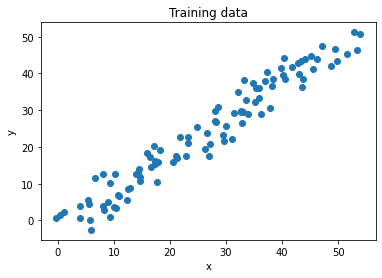

In [39]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.show()

Create model by adding placeholders

In [62]:
X = tf.placeholder("float")
Y = tf.placeholder("float")


Declare model trainable variables (Weights and bias )

In [67]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")


Declare model hyperparameters

In [75]:
learning_rate = 0.01
training_epochs=1000

In [76]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


Train the model with Tensorflow session

In [77]:

# Starting the Tensorflow Session
with tf.Session() as sess:
  
  # Initializing the Variables
  sess.run(init)
  
  # Iterating through all the epochs
  for epoch in range(training_epochs):
    
    # Feeding each data point into the optimizer using Feed Dictionary
    for (_x, _y) in zip(x, y):
      sess.run(optimizer, feed_dict = {X : _x, Y : _y})
    
    # Displaying the result after every 50 epochs
    if (epoch + 1) % 50 == 0:
      # Calculating the cost a every epoch
      c = sess.run(cost, feed_dict = {X : x, Y : y})
      print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
  
  # Storing necessary values to be used outside the Session
  training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)


Epoch 50 : cost = 6.083237 W = 0.9361065 b = -0.34754744
Epoch 100 : cost = 6.070223 W = 0.93688685 b = -0.38723582
Epoch 150 : cost = 6.0588126 W = 0.9375965 b = -0.42333108
Epoch 200 : cost = 6.048791 W = 0.9382419 b = -0.45615804
Epoch 250 : cost = 6.03997 W = 0.9388288 b = -0.48601285
Epoch 300 : cost = 6.0321918 W = 0.9393627 b = -0.51316327
Epoch 350 : cost = 6.025316 W = 0.9398482 b = -0.5378576
Epoch 400 : cost = 6.0192294 W = 0.94028974 b = -0.56031686
Epoch 450 : cost = 6.0138316 W = 0.94069123 b = -0.5807392
Epoch 500 : cost = 6.0090365 W = 0.94105643 b = -0.5993118
Epoch 550 : cost = 6.004768 W = 0.9413886 b = -0.6162089
Epoch 600 : cost = 6.000964 W = 0.9416906 b = -0.6315699
Epoch 650 : cost = 5.99757 W = 0.94196534 b = -0.6455415
Epoch 700 : cost = 5.9945364 W = 0.9422152 b = -0.6582486
Epoch 750 : cost = 5.9918194 W = 0.9424425 b = -0.66980845
Epoch 800 : cost = 5.989386 W = 0.94264907 b = -0.6803175
Epoch 850 : cost = 5.9872026 W = 0.94283706 b = -0.68987846
Epoch 900 